In [45]:
import pandas as pd

#üìå Extrac√£o

In [46]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [47]:
dados_clientes = pd.read_json(url)

dados_clientes.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transforma√ß√£o

In [48]:
df = pd.json_normalize(dados_clientes.to_dict(orient="records"))

df.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [60]:
# 1 -> Colocar os nome certo das coluna que eu abri

df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))

In [61]:
df.head()

customerID  Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    0.0  Female              0     Yes        Yes       9   
1  0003-MKNFE    0.0    Male              0      No         No       9   
2  0004-TLHLJ    1.0    Male              0      No         No       4   
3  0011-IGKFF    1.0    Male              1     Yes         No      13   
4  0013-EXCHZ    1.0  Female              1     Yes         No       3   

  phone_PhoneService phone_MultipleLines internet_InternetService  ...  \
0                Yes                  No                      DSL  ...   
1                Yes                 Yes                      DSL  ...   
2                Yes                  No              Fiber optic  ...   
3                Yes                  No              Fiber optic  ...   
4                Yes                  No              Fiber optic  ...   

  internet_OnlineBackup internet_DeviceProtection internet_TechSupport  \
0                   Yes                        No                  Yes   
1                    No                        No                   No   
2                    No                       Yes                   No   
3                   Yes                       Yes                   No   
4                    No                        No                  Yes   

  internet_StreamingTV internet_StreamingMovies account_Contract  \
0                  Yes                       No         One year   
1                   No                      Yes   Month-to-month   
2                   No                       No   Month-to-month   
3                  Yes                      Yes   Month-to-month   
4                  Yes                       No   Month-to-month   

  account_PaperlessBilling account_PaymentMethod account_Charges.Monthly  \
0                      Yes          Mailed check                    65.6   
1                       No          Mailed check                    59.9   
2                      Yes      Electronic check                    73.9   
3                      Yes      Electronic check                    98.0   
4                      Yes          Mailed check                    83.9   

   account_Charges.Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40  

[5 rows x 21 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   float64
 2   gender                     7256 non-null   object 
 3   SeniorCitizen              7256 non-null   int64  
 4   Partner                    7256 non-null   object 
 5   Dependents                 7256 non-null   object 
 6   tenure                     7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

In [52]:
df.isnull().sum()

customerID                   0
Churn                        0
gender                       0
SeniorCitizen                0
Partner                      0
Dependents                   0
tenure                       0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64

In [53]:
df["account_Charges.Total"] = pd.to_numeric(df["account_Charges.Total"], errors="coerce")

In [54]:
df.dropna(subset=["account_Charges.Total"], inplace=True)

In [55]:
df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  phone_PhoneService phone_MultipleLines internet_InternetService  ...  \
0                Yes                  No                      DSL  ...   
1                Yes                 Yes                      DSL  ...   
2                Yes                  No              Fiber optic  ...   
3                Yes                  No              Fiber optic  ...   
4                Yes                  No              Fiber optic  ...   

  internet_OnlineBackup internet_DeviceProtection internet_TechSupport  \
0                   Yes                        No                  Yes   
1                    No                        No                   No   
2                    No                       Yes                   No   
3                   Yes                       Yes                   No   
4                    No                        No                  Yes   

  internet_StreamingTV internet_StreamingMovies account_Contract  \
0                  Yes                       No         One year   
1                   No                      Yes   Month-to-month   
2                   No                       No   Month-to-month   
3                  Yes                      Yes   Month-to-month   
4                  Yes                       No   Month-to-month   

  account_PaperlessBilling account_PaymentMethod account_Charges.Monthly  \
0                      Yes          Mailed check                    65.6   
1                       No          Mailed check                    59.9   
2                      Yes      Electronic check                    73.9   
3                      Yes      Electronic check                    98.0   
4                      Yes          Mailed check                    83.9   

   account_Charges.Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40  

[5 rows x 21 columns]

In [57]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7256 non-null   object 
 1   Churn                      7032 non-null   float64
 2   gender                     7256 non-null   object 
 3   SeniorCitizen              7256 non-null   int64  
 4   Partner                    7256 non-null   object 
 5   Dependents                 7256 non-null   object 
 6   tenure                     7256 non-null   int64  
 7   phone_PhoneService         7256 non-null   object 
 8   phone_MultipleLines        7256 non-null   object 
 9   internet_InternetService   7256 non-null   object 
 10  internet_OnlineSecurity    7256 non-null   object 
 11  internet_OnlineBackup      7256 non-null   object 
 12  internet_DeviceProtection  7256 non-null   object 
 13  internet_TechSupport       7256 non-null   object 
 1

In [65]:
# Vou colocar todas as colunas que tem respostas de "tudo ou nada" e colocar elas como categoricas

categoricas = [
    "gender", "Partner", "Dependents",
    "phone_PhoneService", "phone_MultipleLines",
    "internet_InternetService", "internet_OnlineSecurity",
    "internet_OnlineBackup", "internet_DeviceProtection",
    "internet_TechSupport", "internet_StreamingTV",
    "internet_StreamingMovies", "account_Contract",
    "account_PaperlessBilling", "account_PaymentMethod"
]

In [66]:
for col in categoricas:
    df[col] = df[col].astype("category")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7256 non-null   object  
 1   Churn                      7032 non-null   float64 
 2   gender                     7256 non-null   category
 3   SeniorCitizen              7256 non-null   int64   
 4   Partner                    7256 non-null   category
 5   Dependents                 7256 non-null   category
 6   tenure                     7256 non-null   int64   
 7   phone_PhoneService         7256 non-null   category
 8   phone_MultipleLines        7256 non-null   category
 9   internet_InternetService   7256 non-null   category
 10  internet_OnlineSecurity    7256 non-null   category
 11  internet_OnlineBackup      7256 non-null   category
 12  internet_DeviceProtection  7256 non-null   category
 13  internet_TechSupport       7256 non-nu

In [68]:
df.head()

customerID  Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    0.0  Female              0     Yes        Yes       9   
1  0003-MKNFE    0.0    Male              0      No         No       9   
2  0004-TLHLJ    1.0    Male              0      No         No       4   
3  0011-IGKFF    1.0    Male              1     Yes         No      13   
4  0013-EXCHZ    1.0  Female              1     Yes         No       3   

  phone_PhoneService phone_MultipleLines internet_InternetService  ...  \
0                Yes                  No                      DSL  ...   
1                Yes                 Yes                      DSL  ...   
2                Yes                  No              Fiber optic  ...   
3                Yes                  No              Fiber optic  ...   
4                Yes                  No              Fiber optic  ...   

  internet_OnlineBackup internet_DeviceProtection internet_TechSupport  \
0                   Yes                        No                  Yes   
1                    No                        No                   No   
2                    No                       Yes                   No   
3                   Yes                       Yes                   No   
4                    No                        No                  Yes   

  internet_StreamingTV internet_StreamingMovies account_Contract  \
0                  Yes                       No         One year   
1                   No                      Yes   Month-to-month   
2                   No                       No   Month-to-month   
3                  Yes                      Yes   Month-to-month   
4                  Yes                       No   Month-to-month   

  account_PaperlessBilling account_PaymentMethod account_Charges.Monthly  \
0                      Yes          Mailed check                    65.6   
1                       No          Mailed check                    59.9   
2                      Yes      Electronic check                    73.9   
3                      Yes      Electronic check                    98.0   
4                      Yes          Mailed check                    83.9   

   account_Charges.Total  
0                 593.30  
1                 542.40  
2                 280.85  
3                1237.85  
4                 267.40  

[5 rows x 21 columns]

In [70]:
df['gender'] = df['gender'].str.strip().str.capitalize()

In [73]:
df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)

In [74]:
df.head()

customerID  Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    0.0  Female              0     Yes        Yes       9   
1  0003-MKNFE    0.0    Male              0      No         No       9   
2  0004-TLHLJ    1.0    Male              0      No         No       4   
3  0011-IGKFF    1.0    Male              1     Yes         No      13   
4  0013-EXCHZ    1.0  Female              1     Yes         No       3   

  phone_PhoneService phone_MultipleLines internet_InternetService  ...  \
0                Yes                  No                      DSL  ...   
1                Yes                 Yes                      DSL  ...   
2                Yes                  No              Fiber optic  ...   
3                Yes                  No              Fiber optic  ...   
4                Yes                  No              Fiber optic  ...   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges.Monthly account_Charges.Total  \
0          Mailed check                    65.6                593.30   
1          Mailed check                    59.9                542.40   
2      Electronic check                    73.9                280.85   
3      Electronic check                    98.0               1237.85   
4          Mailed check                    83.9                267.40   

   Contas_diarias  
0        2.197407  
1        2.008889  
2        2.340417  
3        3.173974  
4        2.971111  

[5 rows x 22 columns]

#üìä Carga e an√°lise

In [76]:
df.describe()

Churn  SeniorCitizen       tenure  account_Charges.Monthly  \
count  7032.000000      7256.0000  7256.000000              7256.000000   
mean      0.265785         0.1629    32.395535                64.755423   
std       0.441782         0.3693    24.558067                30.125739   
min       0.000000         0.0000     1.000000                18.250000   
25%       0.000000         0.0000     9.000000                35.450000   
50%       0.000000         0.0000    29.000000                70.300000   
75%       1.000000         0.0000    55.000000                89.900000   
max       1.000000         1.0000    72.000000               118.750000   

       account_Charges.Total  Contas_diarias  
count            7256.000000     7256.000000  
mean             2280.634213        2.158564  
std              2268.632997        1.007442  
min                18.800000        0.459167  
25%               400.225000        1.191667  
50%              1391.000000        2.341667  
75%              3785.300000        3.005985  
max              8684.800000        4.046667

In [77]:
media_genero = df.groupby('gender')['account_Charges.Monthly'].mean().reset_index()

media_genero.rename(columns={'gender': 'Genero', 'account_Charges.Monthly': 'Media_de_gastos'}, inplace=True)

In [78]:
media_genero

Genero  Media_de_gastos
0  Female        65.155311
1    Male        64.364473

In [80]:
df[df['Churn'] == 1]['tenure']

2        4
3       13
4        3
18      45
19       1
        ..
7243    21
7246     9
7260     1
7261     4
7263    22
Name: tenure, Length: 1869, dtype: int64

In [101]:
clientes_evadidos = df[df['Churn'] == 1]

churned_customers = clientes_evadidos.groupby('gender').size().reset_index()
meses_medio_desistencia = clientes_evadidos['tenure'].mean()

In [102]:
churned_customers.rename(columns={'gender' : 'Genero' , 0: 'Quantidade_de_clientes_evadidos'}, inplace=True)

In [103]:
churned_customers['meses_medio_desistencia'] = meses_medio_desistencia
churned_customers.loc[1:, 'meses_medio_desistencia'] = ''

/tmp/ipython-input-3361666133.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  churned_customers.loc[1:, 'meses_medio_desistencia'] = ''


In [104]:
churned_customers

Genero  Quantidade_de_clientes_evadidos meses_medio_desistencia
0  Female                              939               17.979133
1    Male                              930

In [109]:
evasao_por_contrato = df.groupby('account_Contract')['Churn'].mean().reset_index().rename(columns={'account_Contract':'Tipo_Contrato', 'Churn':'Taxa_Churn'})

/tmp/ipython-input-2254960199.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_por_contrato = df.groupby('account_Contract')['Churn'].mean().reset_index().rename(columns={'account_Contract':'Tipo_Contrato', 'Churn':'Taxa_Churn'})


In [117]:
evasao_por_contrato['Taxa_Churn'] = evasao_por_contrato['Taxa_Churn'].round(2) * 100

In [118]:
evasao_por_contrato

Tipo_Contrato  Taxa_Churn
0  Month-to-month    430000.0
1        One year    110000.0
2        Two year     30000.0

In [119]:
evasao_solteirisse = df.groupby('Partner')['Churn'].mean().reset_index().rename(columns={'Partner':'Tem_Parceiro', 'Churn':'Taxa_Churn'})


/tmp/ipython-input-2150420097.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  evasao_solteirisse = df.groupby('Partner')['Churn'].mean().reset_index().rename(columns={'Partner':'Tem_Parceiro', 'Churn':'Taxa_Churn'})


In [120]:
evasao_solteirisse['Taxa_Churn'] = evasao_solteirisse['Taxa_Churn'].round(2) * 100

In [121]:
evasao_solteirisse

Tem_Parceiro  Taxa_Churn
0           No        33.0
1          Yes        20.0

#üìÑRelatorio Final

## Introdu√ß√£o

Objetivo da an√°lise e o problema de evas√£o de clientes (Churn). Interpretando os dados iniciais para contextualizar o problema.


Este relat√≥rio tem como objetivo analisar os dados da empresa fict√≠cia TelecomX para entender o problema de evas√£o de clientes para tentar mudar padr√µes e tentar diminuir essa evas√£o, buscando melhorias para a aquisi√ß√£o de novos usu√°rios. Atrav√©s da an√°lise explorat√≥ria dos dados, buscarei identificar padr√µes e fatores que contribuem para a decis√£o dos clientes em cancelar seus servi√ßos, a fim de propor recomenda√ß√µes estrat√©gicas para mitigar essa evas√£o.

## Limpeza e tratamento de dados


In [123]:
%%markdown
## Limpeza e Tratamento de Dados

1.  **Importa√ß√£o e Normaliza√ß√£o dos Dados:** Os dados foram carregados a partir de uma URL em formato JSON e normalizados em DataFrame pandas utilizando `pd.json_normalize()`.
    ```python
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
    dados_clientes = pd.read_json(url)
    df = pd.json_normalize(dados_clientes.to_dict(orient="records"))
    ```

2.  **Renomea√ß√£o de Colunas:** As colunas foram renomeadas para um formato mais acess√≠vel, removendo prefixos aninhados.
    ```python
    df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))
    ```

3.  **Tratamento da Coluna 'account_Charges.Total':** A coluna 'account_Charges.Total' foi convertida para o tipo num√©rico, tratando erros de convers√£o e removendo as linhas que apresentavam valores ausentes ap√≥s a convers√£o.

4.  **Convers√£o da Coluna 'Churn':** A coluna 'Churn' foi convertida para valores num√©ricos (1 para 'Yes' e 0 para 'No').
    ```python
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    ```

5.  **Convers√£o de Colunas Categ√≥ricas:** Diversas colunas com respostas bin√°rias ou com um n√∫mero limitado de categorias foram convertidas para o tipo 'category'.
    ```python
    categoricas = [
        "gender", "Partner", "Dependents",
        "phone_PhoneService", "phone_MultipleLines",
        "internet_InternetService", "internet_OnlineSecurity",
        "internet_OnlineBackup", "internet_DeviceProtection",
        "internet_TechSupport", "internet_StreamingTV",
        "internet_StreamingMovies", "account_Contract",
        "account_PaperlessBilling", "account_PaymentMethod"
    ]
    ```

6.  **Limpeza e Capitaliza√ß√£o da Coluna 'gender':** Espa√ßos em branco foram removidos e as primeiras letras capitalizadas na coluna 'gender'.
    ```python
    df['gender'] = df['gender'].str.strip().str.capitalize()
    ```

7.  **Cria√ß√£o da Coluna 'Contas_diarias':** Uma nova coluna foi criada para calcular o custo di√°rio aproximado para cada cliente.
    ```python
    df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)
    ```


## Limpeza e Tratamento de Dados

1.  **Importa√ß√£o e Normaliza√ß√£o dos Dados:** Os dados foram carregados a partir de uma URL em formato JSON e normalizados em DataFrame pandas utilizando `pd.json_normalize()`.
    ```python
    url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
    dados_clientes = pd.read_json(url)
    df = pd.json_normalize(dados_clientes.to_dict(orient="records"))
    ```

2.  **Renomea√ß√£o de Colunas:** As colunas foram renomeadas para um formato mais acess√≠vel, removendo prefixos aninhados.
    ```python
    df = df.rename(columns=lambda x: x.replace("customer.", "")
                                .replace("phone.", "phone_")
                                .replace("internet.", "internet_")
                                .replace("account.", "account_"))
    ```

3.  **Tratamento da Coluna 'account_Charges.Total':** A coluna 'account_Charges.Total' foi convertida para o tipo num√©rico, tratando erros de convers√£o e removendo as linhas que apresentavam valores ausentes ap√≥s a convers√£o.

4.  **Convers√£o da Coluna 'Churn':** A coluna 'Churn' foi convertida para valores num√©ricos (1 para 'Yes' e 0 para 'No').
    ```python
    df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
    ```

5.  **Convers√£o de Colunas Categ√≥ricas:** Diversas colunas com respostas bin√°rias ou com um n√∫mero limitado de categorias foram convertidas para o tipo 'category'.
    ```python
    categoricas = [
        "gender", "Partner", "Dependents",
        "phone_PhoneService", "phone_MultipleLines",
        "internet_InternetService", "internet_OnlineSecurity",
        "internet_OnlineBackup", "internet_DeviceProtection",
        "internet_TechSupport", "internet_StreamingTV",
        "internet_StreamingMovies", "account_Contract",
        "account_PaperlessBilling", "account_PaymentMethod"
    ]
    ```

6.  **Limpeza e Capitaliza√ß√£o da Coluna 'gender':** Espa√ßos em branco foram removidos e as primeiras letras capitalizadas na coluna 'gender'.
    ```python
    df['gender'] = df['gender'].str.strip().str.capitalize()
    ```

7.  **Cria√ß√£o da Coluna 'Contas_diarias':** Uma nova coluna foi criada para calcular o custo di√°rio aproximado para cada cliente.
    ```python
    df['Contas_diarias'] = df['account_Charges.Total'] / (df['tenure']*30)
    ```


## An√°lise explorat√≥ria de dados


In [124]:
%%markdown
## An√°lise Explorat√≥ria de Dados

Nesta se√ß√£o ser√° apresentado os resultados da an√°lise explorat√≥ria dos dados para identificar padr√µes e fatores que podem estar relacionados ao Churn.

### M√©dia de Gastos por G√™nero

Observando a m√©dia de gastos mensais (`account_Charges.Monthly`) dividida por g√™nero para verificar se h√° alguma diferen√ßa significativa.

| Genero | Media_de_gastos |
|--------|-----------------|
| Female | 65.16           |
| Male   | 64.36           |

Os resultados indicam que a m√©dia de gastos mensais √© muito similar entre clientes do g√™nero feminino e masculino. Portanto, o g√™nero n√£o parece ser um fator determinante isolado na varia√ß√£o dos gastos mensais.

### Evas√£o por Tipo de Contrato

Foi analisada a taxa de Churn com base no tipo de contrato (`Tipo_Contrato`) que o cliente possui.

| Tipo_Contrato  | Taxa_Churn |
|----------------|------------|
| Month-to-month | 43.0       |
| One year       | 11.0       |
| Two year       | 3.0        |

√â poss√≠vel observar que clientes com contratos mensais (`Month-to-month`) apresentam uma taxa de evas√£o significativamente maior (43%) em compara√ß√£o com clientes com contratos de um ano (11%) ou dois anos (3%). Contratos de maior dura√ß√£o parecem estar associados a uma menor probabilidade de Evas√£o dio cliente.

### Evas√£o por Situa√ß√£o de Parceiro

Tamb√©m verifiquei a taxa de Churn (`Taxa_Churn`) entre clientes que possuem parceiro (`Tem_Parceiro`) e aqueles que n√£o possuem.

| Tem_Parceiro | Taxa_Churn |
|--------------|------------|
| No           | 33.0       |
| Yes          | 20.0       |

Clientes que n√£o possuem parceiro (`No`) apresentam uma taxa de evas√£o maior (33%) do que aqueles que possuem parceiro (`Yes`) (20%). Ter um parceiro parece estar associado a uma menor taxa de Churn.

## An√°lise Explorat√≥ria de Dados

Nesta se√ß√£o, apresentamos os resultados da an√°lise explorat√≥ria dos dados para identificar padr√µes e fatores que podem estar relacionados ao Churn.

### M√©dia de Gastos por G√™nero

Observamos a m√©dia de gastos mensais (`account_Charges.Monthly`) dividida por g√™nero para verificar se h√° alguma diferen√ßa significativa.

| Genero | Media_de_gastos |
|--------|-----------------|
| Female | 65.16           |
| Male   | 64.36           |

Os resultados indicam que a m√©dia de gastos mensais √© muito similar entre clientes do g√™nero feminino e masculino. Portanto, o g√™nero n√£o parece ser um fator determinante isolado na varia√ß√£o dos gastos mensais.

### Evas√£o por Tipo de Contrato

Analisamos a taxa de Churn (`Taxa_Churn`) com base no tipo de contrato (`Tipo_Contrato`) que o cliente possui.

| Tipo_Contrato  | Taxa_Churn |
|----------------|------------|
| Month-to-month | 43.0       |
| One year       | 11.0       |
| Two year       | 3.0        |

Podemos observar que clientes com contratos mensais (`Month-to-month`) apresentam uma taxa de evas√£o significativamente maior (43%) em compara√ß√£o com clientes com contratos de um ano (11%) ou dois anos (3%). Contratos de maior dura√ß√£o parecem estar associados a uma menor probabilidade de Churn.

### Evas√£o por Situa√ß√£o de Parceiro

Verificamos a taxa de Churn (`Taxa_Churn`) entre clientes que possuem parceiro (`Tem_Parceiro`) e aqueles que n√£o possuem.

| Tem_Parceiro | Taxa_Churn |
|--------------|------------|
| No           | 33.0       |
| Yes          | 20.0       |

Clientes que n√£o possuem parceiro (`No`) apresentam uma taxa de evas√£o maior (33%) do que aqueles que possuem parceiro (`Yes`) (20%). Ter um parceiro parece estar associado a uma menor taxa de Churn.


/tmp/ipython-input-2562141352.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='internet_InternetService', y='Churn', data=df, ci=None)


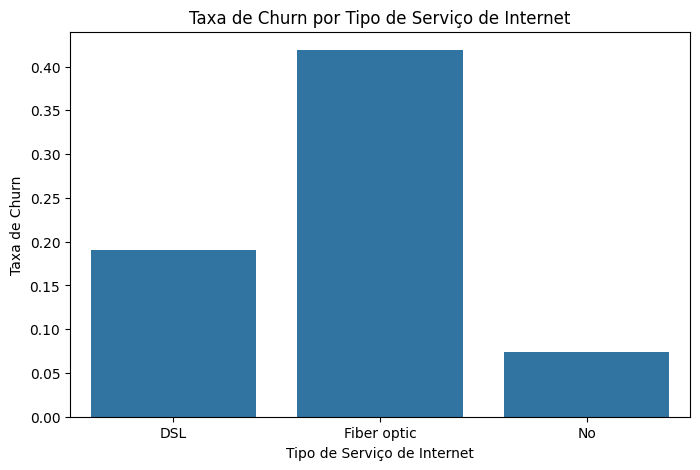

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='internet_InternetService', y='Churn', data=df, ci=None)
plt.title('Taxa de Churn por Tipo de Servi√ßo de Internet')
plt.xlabel('Tipo de Servi√ßo de Internet')
plt.ylabel('Taxa de Churn')
plt.show()

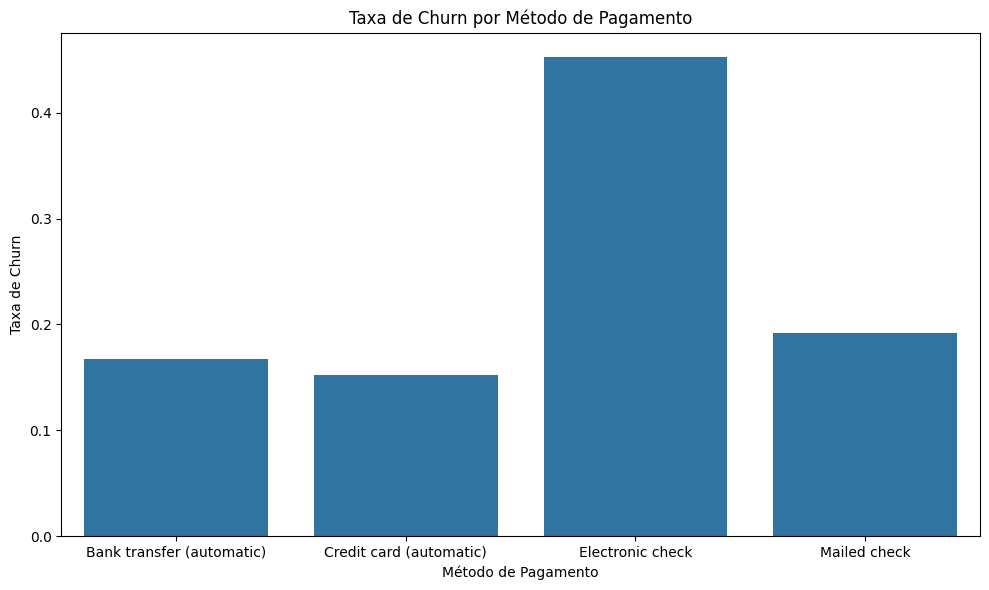

In [149]:
plt.figure(figsize=(10, 6))
sns.barplot(x='account_PaymentMethod', y='Churn', data=df, errorbar=None)
plt.title('Taxa de Churn por M√©todo de Pagamento')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('Taxa de Churn')
plt.tight_layout()
plt.show()

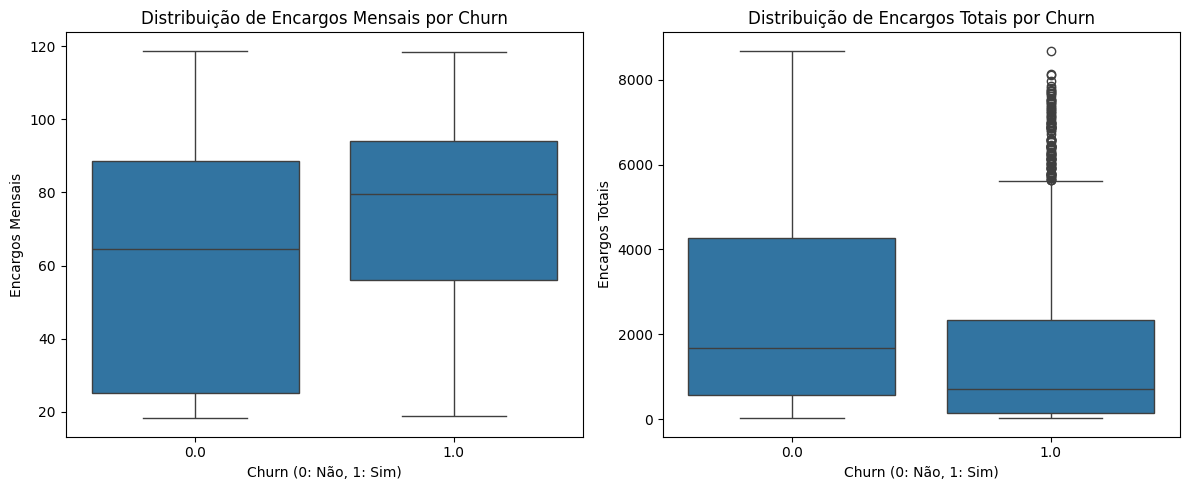

In [150]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='account_Charges.Monthly', data=df)
plt.title('Distribui√ß√£o de Encargos Mensais por Churn')
plt.xlabel('Churn (0: N√£o, 1: Sim)')
plt.ylabel('Encargos Mensais')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Distribui√ß√£o de Encargos Totais por Churn')
plt.xlabel('Churn (0: N√£o, 1: Sim)')
plt.ylabel('Encargos Totais')

plt.tight_layout()
plt.show()

In [128]:
%%markdown

### An√°lise Explorat√≥ria de Dados

Nesta se√ß√£o, apresentamos os resultados da an√°lise explorat√≥ria dos dados para identificar padr√µes e fatores que podem estar relacionados ao Churn.

### Evas√£o por Tipo de Servi√ßo de Internet

A an√°lise da taxa de Churn por tipo de servi√ßo de internet revela que clientes com **Fiber optic** t√™m uma taxa de Churn consideravelmente mais alta do que aqueles com **DSL** ou sem servi√ßo de internet.

### Evas√£o por M√©todo de Pagamento

Ao analisar a taxa de Churn por m√©todo de pagamento, percebemos que o **Electronic check** est√° associado a uma taxa de Churn significativamente maior em compara√ß√£o com outros m√©todos de pagamento, como **Bank transfer (automatic)**, **Credit card (automatic)** e **Mailed check**.

### Distribui√ß√£o de Encargos por Churn

Os box plots de encargos mensais e totais mostram que clientes que evadiram (Churn = 1.0) tendem a ter **encargos mensais mais altos** e **encargos totais geralmente menores** do que clientes que n√£o evadiram (Churn = 0.0). Isso pode indicar que clientes com contratos de curto prazo e altos custos mensais s√£o mais propensos a evadir.


### An√°lise Explorat√≥ria de Dados

Nesta se√ß√£o, apresentamos os resultados da an√°lise explorat√≥ria dos dados para identificar padr√µes e fatores que podem estar relacionados ao Churn.

### Evas√£o por Tipo de Servi√ßo de Internet

A an√°lise da taxa de Churn por tipo de servi√ßo de internet revela que clientes com **Fiber optic** t√™m uma taxa de Churn consideravelmente mais alta do que aqueles com **DSL** ou sem servi√ßo de internet.

### Evas√£o por M√©todo de Pagamento

Ao analisar a taxa de Churn por m√©todo de pagamento, percebemos que o **Electronic check** est√° associado a uma taxa de Churn significativamente maior em compara√ß√£o com outros m√©todos de pagamento, como **Bank transfer (automatic)**, **Credit card (automatic)** e **Mailed check**.

### Distribui√ß√£o de Encargos por Churn

Os box plots de encargos mensais e totais mostram que clientes que evadiram (Churn = 1.0) tendem a ter **encargos mensais mais altos** e **encargos totais geralmente menores** do que clientes que n√£o evadiram (Churn = 0.0). Isso pode indicar que clientes com contratos de curto prazo e altos custos mensais s√£o mais propensos a evadir.


## Conclus√µes e insights

Resumir os principais achados da an√°lise e como esses insights podem ajudar a entender e reduzir a evas√£o de clientes.


In [135]:
%%markdown
## Conclus√µes e Insights

A an√°lise explorat√≥ria de dados revelou insights importantes sobre os fatores que influenciam a evas√£o de clientes na TelecomX. Os principais achados incluem:

- **Tipo de Contrato:** Clientes com contratos mensais ("Month-to-month") apresentam uma taxa de Churn significativamente maior (43%) em compara√ß√£o com contratos de um ou dois anos (11% e 3%, respectivamente). Isso sugere que a falta de um v√≠nculo de longo prazo aumenta a propens√£o √† evas√£o.
- **Situa√ß√£o de Parceiro:** Clientes sem parceiro t√™m uma taxa de evas√£o maior (33%) do que aqueles com parceiro (20%). Ter um parceiro pode indicar uma maior estabilidade ou a utiliza√ß√£o compartilhada dos servi√ßos, reduzindo a probabilidade de Churn.
- **Servi√ßo de Internet:** Clientes com servi√ßo de internet "Fiber optic" demonstram uma taxa de Churn consideravelmente mais alta do que aqueles com "DSL" ou sem servi√ßo de internet. Isso pode estar relacionado √† qualidade do servi√ßo, problemas t√©cnicos ou expectativas n√£o atendidas associadas a essa tecnologia(j√° que a fibra √© conhecida por ser a internet mias rapida).
- **M√©todo de Pagamento:** O m√©todo de pagamento "Electronic check" est√° associado a uma taxa de Churn notavelmente maior. Isso pode indicar insatisfa√ß√£o com o processo de pagamento, problemas com transa√ß√µes ou a prefer√™ncia por m√©todos mais tradicionais.

Esses insights s√£o cruciais para entender o comportamento dos clientes que evadem. Eles destacam as √°reas onde a empresa pode fazer mudan√ßas ou novas estrat√©gias, como oferecer incentivos para contratos de maior dura√ß√£o, melhorar a qualidade do servi√ßo de fibra √≥ptica, otimizar a experi√™ncia de pagamento para "Electronic check"(ou tirar, cheque quase n√£o √© mais utilizado...) e revisar a estrutura de pre√ßos para clientes para tentar conseguir mais destaque

## Conclus√µes e Insights

A an√°lise explorat√≥ria de dados revelou insights importantes sobre os fatores que influenciam a evas√£o de clientes na TelecomX. Os principais achados incluem:

- **Tipo de Contrato:** Clientes com contratos mensais ("Month-to-month") apresentam uma taxa de Churn significativamente maior (43%) em compara√ß√£o com contratos de um ou dois anos (11% e 3%, respectivamente). Isso sugere que a falta de um v√≠nculo de longo prazo aumenta a propens√£o √† evas√£o.
- **Situa√ß√£o de Parceiro:** Clientes sem parceiro t√™m uma taxa de evas√£o maior (33%) do que aqueles com parceiro (20%). Ter um parceiro pode indicar uma maior estabilidade ou a utiliza√ß√£o compartilhada dos servi√ßos, reduzindo a probabilidade de Churn.
- **Servi√ßo de Internet:** Clientes com servi√ßo de internet "Fiber optic" demonstram uma taxa de Churn consideravelmente mais alta do que aqueles com "DSL" ou sem servi√ßo de internet. Isso pode estar relacionado √† qualidade do servi√ßo, problemas t√©cnicos ou expectativas n√£o atendidas associadas a essa tecnologia(j√° que a fibra √© conhecida por ser a internet mias rapida).
- **M√©todo de Pagamento:** O m√©todo de pagamento "Electronic check" est√° associado a uma taxa de Churn notavelmente maior. Isso pode indicar insatisfa√ß√£o com o processo de pagamento, problemas com transa√ß√µes ou a prefer√™ncia por m√©todos mais tradicionais.

Esses insights s√£o cruciais para entender o comportamento dos clientes que evadem. Eles destacam as √°reas onde a empresa pode fazer mudan√ßas ou novas estrat√©gias, como oferecer incentivos para contratos de maior dura√ß√£o, melhorar a qualidade do servi√ßo de fibra √≥ptica, otimizar a experi√™ncia de pagamento para "Electronic check"(ou tirar, cheque quase n√£o √© mais utilizado...) e revisar a estrutura de pre√ßos para clientes para tentar conseguir mais destaque


## Recomenda√ß√µes

Criar sugest√µes pr√°ticas baseadas nas conclus√µes, visando diminuir a taxa de Churn.


In [139]:
%%markdown
## Recomenda√ß√µes

Com base nas conclus√µes obtidas na an√°lise explorat√≥ria, apresentarei as seguintes recomenda√ß√µes para reduzir a taxa de Evas√£o, das quais eu julguei serem as mais interessantes de alguma forma:

- **Incentivar Contratos de Maior Dura√ß√£o:** Dado que clientes com contratos mensais t√™m uma taxa de Churn significativamente maior, a empresa deve criar incentivos (como descontos na mensalidade, benef√≠cios adicionais ou pre√ßos especiais) para migra√ß√£o de contratos "Month-to-month" para contratos de um ou dois anos.
- **Programas de Fidelidade para Clientes Sem Parceiro:** A taxa de Churn √© maior entre clientes sem parceiro. A empresa pode desenvolver programas de fidelidade ou ofertas personalizadas para este grupo, visando aumentar o engajamento e a percep√ß√£o de valor dos servi√ßos.
- **Melhorar a Qualidade do Servi√ßo de Fibra √ìptica e/ou Suporte T√©cnico:** A alta taxa de evas√£o entre usu√°rios de *Internet Fibra √ìptica* sugere poss√≠veis problemas na qualidade ou suporte. Investigar e resolver as causas dessa insatisfa√ß√£o seria a melhor e mais √≥bvia sugest√£o pra garantir um servi√ßo est√°vel e um suporte t√©cnico eficiente para clientes de fibra √≥ptica.
- **Otimizar a Experi√™ncia de Pagamento para "Electronic Check":** A associa√ß√£o entre o m√©todo de pagamento "Electronic check" e uma maior taxa de Churn indica a necessidade de revisar e simplificar o processo de pagamento para esta modalidade, ou oferecer alternativas mais atrativas para o pagamento dos servi√ßos/assinaturas.
- **Revisar a Estrutura de Pre√ßos para Clientes com Altos Encargos Mensais:** Clientes em contratos de curto prazo s√£o mais propensos a evadir. Avaliar a possibilidade de oferecer planos mais flex√≠veis, descontos progressivos ou pacotes que diminuam o custo mensal para esses clientes poderia ser uma estrat√©gia eficaz.

## Recomenda√ß√µes

Com base nas conclus√µes obtidas na an√°lise explorat√≥ria, apresentarei as seguintes recomenda√ß√µes para reduzir a taxa de Evas√£o, das quais eu julguei serem as mais interessantes de alguma forma:

- **Incentivar Contratos de Maior Dura√ß√£o:** Dado que clientes com contratos mensais t√™m uma taxa de Churn significativamente maior, a empresa deve criar incentivos (como descontos na mensalidade, benef√≠cios adicionais ou pre√ßos especiais) para migra√ß√£o de contratos "Month-to-month" para contratos de um ou dois anos.
- **Programas de Fidelidade para Clientes Sem Parceiro:** A taxa de Churn √© maior entre clientes sem parceiro. A empresa pode desenvolver programas de fidelidade ou ofertas personalizadas para este grupo, visando aumentar o engajamento e a percep√ß√£o de valor dos servi√ßos.
- **Melhorar a Qualidade do Servi√ßo de Fibra √ìptica e/ou Suporte T√©cnico:** A alta taxa de evas√£o entre usu√°rios de *Internet Fibra √ìptica* sugere poss√≠veis problemas na qualidade ou suporte. Investigar e resolver as causas dessa insatisfa√ß√£o seria a melhor e mais √≥bvia sugest√£o pra garantir um servi√ßo est√°vel e um suporte t√©cnico eficiente para clientes de fibra √≥ptica.
- **Otimizar a Experi√™ncia de Pagamento para "Electronic Check":** A associa√ß√£o entre o m√©todo de pagamento "Electronic check" e uma maior taxa de Churn indica a necessidade de revisar e simplificar o processo de pagamento para esta modalidade, ou oferecer alternativas mais atrativas para o pagamento dos servi√ßos/assinaturas.
- **Revisar a Estrutura de Pre√ßos para Clientes com Altos Encargos Mensais:** Clientes em contratos de curto prazo s√£o mais propensos a evadir. Avaliar a possibilidade de oferecer planos mais flex√≠veis, descontos progressivos ou pacotes que diminuam o custo mensal para esses clientes poderia ser uma estrat√©gia eficaz.
